In [4]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, download_plotlyjs
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
init_notebook_mode(connected=True)
from plotly.tools import FigureFactory as ff
import random
from collections import Counter
import warnings
import json
import os
import datetime
from pandas.io.json import json_normalize
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
import pycountry
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sub = pd.read_csv('sample_submission.csv')

In [6]:
# helper functions
def constant_cols(df):
    cols = []
    columns = df.columns.values
    for col in columns:
        if df[col].nunique(dropna = False) == 1:
            cols.append(col)
    return cols

def diff_cols(df1,df2):
    columns1 = df1.columns.values
    columns2 = df2.columns.values
    print(list(set(columns1) - set(columns2)))
    

def count_mean(col,color1,color2):
    col_count = train_df[col].value_counts()
    col_count_chart = go.Bar(x = col_count.head(10).index, y = col_count.head(10).values, name="Count",marker = dict(color=color1))

    col_mean_count = train_df[[col,'totals.transactionRevenue']][(train_df['totals.transactionRevenue'] >1)]
    col_mean_count = col_mean_count.groupby(col)['totals.transactionRevenue'].mean().sort_values(ascending=False)
    col_mean_count_chart = go.Bar(x = col_mean_count.head(10).index, y = col_mean_count.head(10).values, name="Mean",marker = dict(color=color2))

    fig = tools.make_subplots(rows = 1, cols = 2,subplot_titles=('Total Count','Mean Revenue'))
    fig.append_trace(col_count_chart, 1,1)
    fig.append_trace(col_mean_count_chart,1,2)
    py.iplot(fig)

In [7]:
def load_df(csv_path='train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(
            column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [8]:
train_df = load_df()

Loaded train.csv. Shape: (903653, 55)


In [9]:
test_df = load_df('test.csv')

Loaded test.csv. Shape: (804684, 53)


In [10]:
test_df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,Asia,Singapore,not available in demo dataset,not available in demo dataset,(not set),myrepublic.com.sg,not available in demo dataset,(not set),Southeast Asia,NaN,4,NaN,4,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Zaragoza,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),rima-tde.net,not available in demo dataset,Aragon,Southern Europe,NaN,5,1,5,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,Not Socially Engaged,1508143220,1,1508143220,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Europe,France,not available in demo dataset,not available in demo dataset,not available in demo dataset,sfr.net,not available in demo dataset,not available in demo dataset,Western Europe,NaN,7,1,7,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,Not Socially Engaged,1508193530,1,1508193530,Safari,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in 

In [11]:
train_df['date']

0         20160902
1         20160902
2         20160902
3         20160902
4         20160902
5         20160902
6         20160902
7         20160902
8         20160902
9         20160902
10        20160902
11        20160902
12        20160902
13        20160902
14        20160902
15        20160902
16        20160902
17        20160902
18        20160902
19        20160902
20        20160902
21        20160902
22        20160902
23        20160902
24        20160902
25        20160902
26        20160902
27        20160902
28        20160902
29        20160902
            ...   
903623    20170104
903624    20170104
903625    20170104
903626    20170104
903627    20170104
903628    20170104
903629    20170104
903630    20170104
903631    20170104
903632    20170104
903633    20170104
903634    20170104
903635    20170104
903636    20170104
903637    20170104
903638    20170104
903639    20170104
903640    20170104
903641    20170104
903642    20170104
903643    20170104
903644    20

In [12]:
test_df['date']

0         20171016
1         20171016
2         20171016
3         20171016
4         20171016
5         20171016
6         20171016
7         20171016
8         20171016
9         20171016
10        20171016
11        20171016
12        20171016
13        20171016
14        20171016
15        20171016
16        20171016
17        20171016
18        20171016
19        20171016
20        20171016
21        20171016
22        20171016
23        20171016
24        20171016
25        20171016
26        20171016
27        20171016
28        20171016
29        20171016
            ...   
804654    20180421
804655    20180421
804656    20180421
804657    20180421
804658    20180421
804659    20180421
804660    20180421
804661    20180421
804662    20180421
804663    20180421
804664    20180421
804665    20180421
804666    20180421
804667    20180421
804668    20180421
804669    20180421
804670    20180421
804671    20180421
804672    20180421
804673    20180421
804674    20180421
804675    20

In [15]:
test_df = load_df("test.csv")

Loaded test.csv. Shape: (804684, 53)


In [13]:
diff_cols(train_df,test_df)

['totals.transactionRevenue', 'trafficSource.campaignCode']


In [14]:
train_constants = constant_cols(train_df)
test_constants = constant_cols(test_df)
print(train_constants)
print(test_constants)

['socialEngagementType', 'device.browserSize', 'device.browserVersion', 'device.flashVersion', 'device.language', 'device.mobileDeviceBranding', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel', 'device.mobileInputSelector', 'device.operatingSystemVersion', 'device.screenColors', 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits', 'trafficSource.adwordsClickInfo.criteriaParameters']
['socialEngagementType', 'device.browserSize', 'device.browserVersion', 'device.flashVersion', 'device.language', 'device.mobileDeviceBranding', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel', 'device.mobileInputSelector', 'device.operatingSystemVersion', 'device.screenColors', 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits', 'trafficSource.adwo

In [15]:
train_df["totals.transactionRevenue"] = train_df["totals.transactionRevenue"].astype('float')
train_df['totals.transactionRevenue'] = train_df['totals.transactionRevenue'].fillna(0)
train_df['date'] = train_df['date'].astype(str)
train_df["date"] = train_df["date"].apply(lambda x : x[:4] + "-" + x[4:6] + "-" + x[6:])
train_df["date"] = pd.to_datetime(train_df["date"])

In [16]:
train_constants = constant_cols(train_df)
test_constants = constant_cols(test_df)
train_df = train_df.drop(columns=train_constants,axis = 1)
test_df = test_df.drop(columns=test_constants, axis = 1)

In [20]:
null_values = train_df.isna().sum(axis = 0).reset_index()
null_values = null_values[null_values[0] > 50]
null_chart = [go.Bar(y = null_values['index'],x = null_values[0]*100/len(train_df), orientation = 'h')]
py.iplot(null_chart)

In [21]:
data = train_df[['channelGrouping','totals.transactionRevenue']]
temp = data['channelGrouping'].value_counts()
chart = [go.Pie(labels = temp.index, values = temp.values)]
py.iplot(chart)

Original plot, do not use in project!!!

In [22]:
temp2 = data.groupby('channelGrouping').sum().reset_index()
temp2

,channelGrouping,totals.transactionRevenue
0,(Other),9.990000e+06
1,Affiliates,5.973800e+08
2,Direct,4.348406e+11
3,Display,7.833746e+10
4,Organic Search,3.263805e+11
5,Paid Search,4.355890e+10
6,Referral,6.514299e+11
7,Social,4.916540e+09


In [23]:
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, .48]},
      "name": "Channel group",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": temp2['totals.transactionRevenue'],
      "labels": temp2['channelGrouping'],
      "text":["Group rev"],
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Group rev",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Channel group analysis",
        "annotations": [
            {
                "font": {
                    "size": 15
                },
                "showarrow": False,
                "text": "channel group",
                "x": 0.17,
                "y": 0.5
            },
            {
                "font": {
                    "size": 15
                },
                "showarrow": False,
                "text": "group revenue",
                "x": 0.84,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')


Modified from original plot can be used

In [24]:
temp = train_df['device.isMobile'].value_counts()
chart = go.Bar(x = ["False","True"], y = temp.values)
py.iplot([chart])

In [25]:
count_mean('device.browser',"#80DEEA","#4DA990")


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



Modified can be used

In [26]:
count_mean('device.deviceCategory',"#FF851B","#FF4136")


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [27]:
count_mean('device.operatingSystem',"#80DEEA","#0097A7")


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [28]:
count_mean('geoNetwork.continent',"#F48FB1","#C2185B")


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [29]:
data = train_df[['geoNetwork.country','totals.transactionRevenue']][(train_df['totals.transactionRevenue'] >1)]
temp = data.groupby('geoNetwork.country',as_index=False)['totals.transactionRevenue'].mean()
temp['code'] = 'sample'
for i,country in enumerate(temp['geoNetwork.country']):
    mapping = {country.name: country.alpha_3 for country in pycountry.countries}
    temp.set_value(i,'code',mapping.get(country))
chart = [ dict(
        type = 'choropleth',
        locations = temp['code'],
        z = temp['totals.transactionRevenue'],
        text = temp['geoNetwork.country'],
        autocolorscale = True,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                  width = 0.5
            ) ),
        colorbar = dict(
            autotick = True,
            title = 'Mean Revenue'),
      ) ]

layout = dict(
    title = 'Mean revenue based on country',
    geo = dict(
        showframe = True,
        showcoastlines = True,
         showocean = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=chart, layout=layout )
py.iplot( fig, validate=False)

In [30]:
count_mean('geoNetwork.metro',"#CE93D8", "#7B1FA2")


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [31]:
count_mean('geoNetwork.networkDomain','#90CAF9','#1976D2')


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [32]:
count_mean('geoNetwork.region','#DCE775','#AFB42B')


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [33]:
count_mean('geoNetwork.subContinent','#FFE082','#FFA000')


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [34]:
train_df['totals.pageviews'] = train_df['totals.pageviews'].fillna(0).astype('int32')
train_df['totals.bounces'] = train_df['totals.bounces'].fillna(0).astype('int32')

pageview = train_df.groupby('date')['totals.pageviews'].apply(lambda x:x[x >= 1].count()).reset_index()
bounce = train_df.groupby('date')['totals.bounces'].apply(lambda x:x[x >= 1].count()).reset_index()

pageviews = go.Scatter(x = pageview['date'],y= pageview['totals.pageviews'], name = 'Pageview',marker=dict(color = "#B0BEC5"))


bounces = go.Scatter(x = bounce['date'],y= bounce['totals.bounces'],name = 'Bounce',marker=dict(color = "#37474F"))

py.iplot([pageviews,bounces])

In [35]:
train_df['totals.newVisits'] = train_df['totals.newVisits'].fillna(0).astype('int32')
train_df['totals.hits'] = train_df['totals.hits'].fillna(0).astype('int32')

newvisit = train_df.groupby('date')['totals.newVisits'].apply(lambda x:x[x == 1].count()).reset_index()
oldVisit = train_df.groupby('date')['totals.newVisits'].apply(lambda x:x[x == 0].count()).reset_index()
hit = train_df.groupby('date')['totals.hits'].apply(lambda x:x[x >= 1].count()).reset_index()


hits = go.Scatter(x = hit['date'],y = hit['totals.hits'], name = 'total hits', marker=dict(color = '#FFEE58'))

new_vist = go.Scatter(x = newvisit['date'],y= newvisit['totals.newVisits'],name = 'New Vists', marker=dict(color = '#F57F17'))

oldvisit = go.Scatter(x = oldVisit['date'],y = oldVisit['totals.newVisits'], name = 'Old Visit', marker=dict(color = '#FFD600'))

py.iplot([hits, new_vist, oldvisit])

In [36]:
temp = train_df[(train_df['totals.transactionRevenue'] >0)]
data = temp[['totals.transactionRevenue','date']].groupby('date')['totals.transactionRevenue'].agg(['min','max']).reset_index()
mean = go.Scatter(x = data['date'], y = data['min'],name = "Min",marker = dict(color = '#00E676'))
count = go.Scatter(x = data['date'],y = data['max'], name = "Max",marker = dict(color = '#00838F'))
py.iplot([mean,count])

In [37]:
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['weekday'] = train_df['date'].dt.weekday

In [38]:
temp = train_df.groupby('month')['totals.transactionRevenue'].agg(['count','mean']).reset_index()
count_chart = go.Bar(x = temp['month'], y = temp['count'],name = 'Count',marker = dict(color = "#E6EE9C"))
mean_chart = go.Bar(x = temp['month'],y = temp['mean'], name = 'Mean',marker = dict(color = "#AFB42B"))

fig = tools.make_subplots(rows = 1, cols = 2, subplot_titles = ('Total Count', 'Mean Count'))
fig.append_trace(count_chart,1,1)
fig.append_trace(mean_chart, 1,2)
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [39]:
temp = train_df.groupby('day')['totals.transactionRevenue'].agg(['count','mean']).reset_index()
count_chart = go.Bar(x = temp['day'], y = temp['count'],name = 'Count', marker = dict(color = '#1DE9B6'))
mean_chart = go.Bar(x = temp['day'],y = temp['mean'], name = 'Mean', marker = dict(color = '#00796B'))

fig = tools.make_subplots(rows = 1, cols = 2, subplot_titles = ('Total Count', 'Mean Count'))
fig.append_trace(count_chart,1,1)
fig.append_trace(mean_chart, 1,2)
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [40]:
temp = train_df.groupby('weekday')['totals.transactionRevenue'].agg(['count','mean']).reset_index()
count_chart = go.Bar(x = temp['weekday'], y = temp['count'],name = 'Count', marker = dict(color = '#9575CD'))
mean_chart = go.Bar(x = temp['weekday'],y = temp['mean'], name = 'Mean', marker = dict(color = '#B388FF'))

fig = tools.make_subplots(rows = 1, cols = 2, subplot_titles = ('Total Count', 'Mean Count'))
fig.append_trace(count_chart,1,1)
fig.append_trace(mean_chart, 1,2)
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



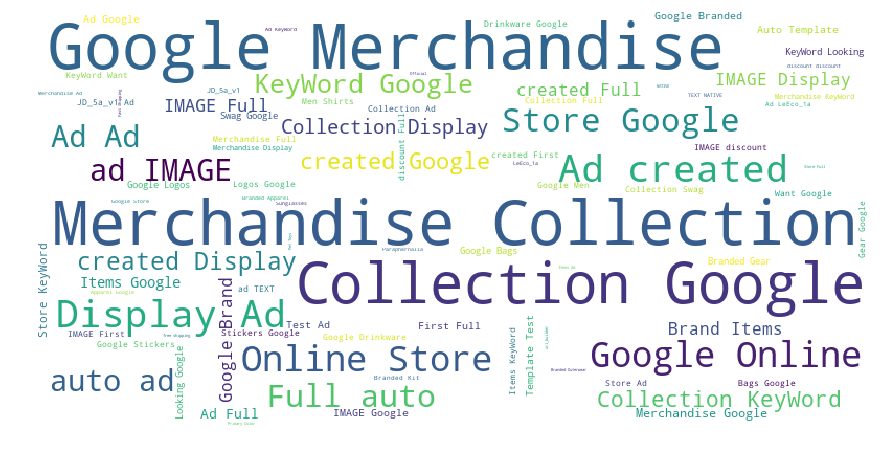

In [41]:
train_df['trafficSource.adContent'] = train_df['trafficSource.adContent'].fillna('')
wordcloud2 = WordCloud(width=800, height=400, max_font_size=60, max_words=200, background_color="white").generate(' '.join(train_df['trafficSource.adContent']))
plt.figure( figsize=(15,20))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

Modified can be used

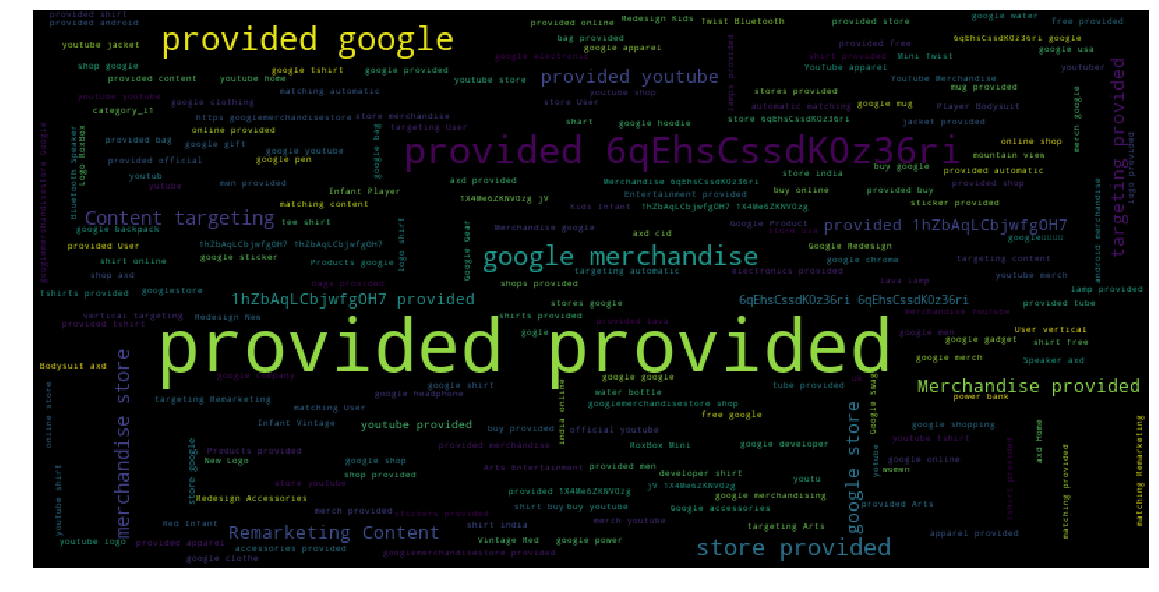

In [42]:
train_df['trafficSource.keyword'] = train_df['trafficSource.keyword'].fillna('')
wordcloud2 = WordCloud(width=800, height=400).generate(' '.join(train_df['trafficSource.keyword']))
plt.figure( figsize=(20,20) )
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

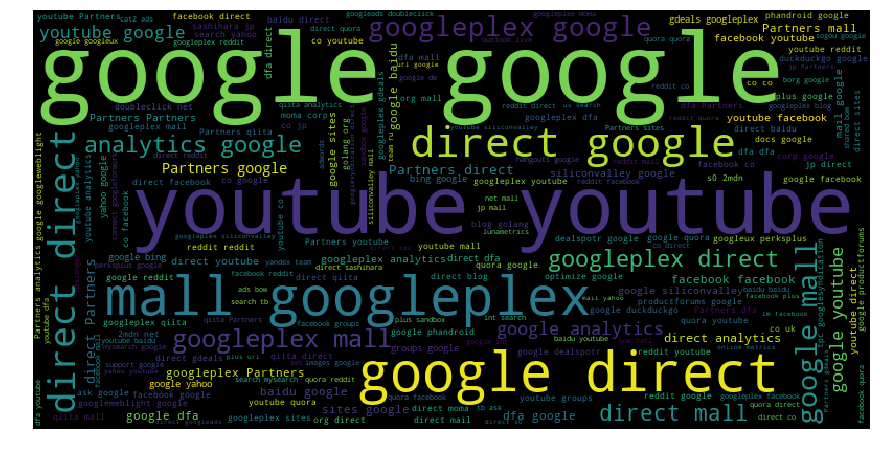

In [43]:
train_df['trafficSource.source'] = train_df['trafficSource.source'].fillna('')
wordcloud2 = WordCloud(width=800, height=400).generate(' '.join(train_df['trafficSource.source']))
plt.figure( figsize=(15,20) )
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [44]:
train_df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,month,day,weekday
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,1,1,1,1,0.0,,NaN,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google,9,2,4
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,1,1,1,1,0.0,,NaN,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google,9,2,4
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,1,1,1,1,0.0,,NaN,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google,9,2,4
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,desktop,False,Linux,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1,1,1,1,0.0,,NaN,NaN,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google,9,2,4
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,mobile,True,Android,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,1,1,0,1,0.0,,NaN,NaN,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google,9,2,4


In [45]:
colorscale = [[0, 'rgb(102,194,165)'], [0.0005, 'rgb(102,194,165)'], 
              [0.01, 'rgb(171,221,164)'], [0.02, 'rgb(230,245,152)'], 
              [0.04, 'rgb(255,255,191)'], [0.05, 'rgb(254,224,139)'], 
              [0.10, 'rgb(253,174,97)'], [0.25, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]

data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = colorscale,
        showscale = True,
        locations = train_df["geoNetwork.country"].value_counts().index,
        locationmode = 'country names',
        z = train_df["geoNetwork.country"].value_counts().values,
        marker = dict(
            line = dict(color = 'rgb(250,250,225)', width = 1)),
            colorbar = dict( title = 'Customer Visits ')
            ) 
       ]

layout = dict(
    height=600,
    title = 'Global customer distribution',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(10,67,140)',
        projection = dict(
        type = 'conic equal area',
            rotation = dict(
                    lon = 50,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(12, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(12, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
iplot(fig)